<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/7)_B)_NY_Tweet_Topic_Modeling___LDA_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Latent Dirichlet Allocation (LDA) will be used to analyze tweets and identify themes discussed in relation to covid-19 

In [ ]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint

import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis

!pip install -U scikit-learn # updating sklearn to avoid depreciation warnings
!pip install --upgrade pandas==1.2  # Need to upgrade pandas to get pyLDAvis to work 

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

In [ ]:
# now Im going to upload my test set - which is just my Ontario covid tweets data scraped using sncrape
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_SENTS.csv')
tweets_df = data.iloc[:, 1:]
tweets_df.drop_duplicates('Text', inplace=True)

is_na = tweets_df['Text'].isna()
is_nalist = tweets_df[is_na]
print(is_nalist)
is_not_na = tweets_df['Text'].notna()
tweets_df = tweets_df[is_not_na]
tweets_df

      Datetime Text  ... Sentiment_Score_Norm  Sentiment
11  2021-05-30  NaN  ...                 50.0    neutral

[1 rows x 6 columns]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative
2,2021-05-30,thank municipal bigwig vocal covid denial ceme...,no thanks to the municipal bigwig whose vocal...,-0.0015,49.925,neutral
3,2021-05-30,¡ president trump siempre estuvo en lo cierto ...,¡president trump siempre estuvo...,0.0000,50.000,neutral
4,2021-05-30,isyes school positivity rate peak covid winter...,it isyes school positivity rate has been und...,0.5562,77.810,positive
...,...,...,...,...,...,...
588014,2020-04-14,mean they re probably go federal money catalog...,it means theyre probably going to get federa...,-0.5574,22.130,negative
588015,2020-04-14,trump halt fund world health organization fail...,so if trump can halt funding to world health o...,-0.6705,16.475,negative
588016,2020-04-14,ought plan daily joint news conference feature...,you and ought to plan a daily joint news con...,-0.4215,28.925,negative
588017,2020-04-14,coronavirus tax change benefit millionaire inc...,in the next coronavirus bill please the tax...,0.5267,76.335,positive


In [ ]:
tweets_list = tweets_df['Text'].tolist()

# LDA w/ Sklearn

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  #vectoriser object
tf = tf_vectorizer.fit_transform(tweets_list) # document-term matrix
alpha = 1     #Dirichlet prior of document-topic dist
beta = 0.05   #Dirichlet prior of topic-term dist

In [ ]:
# 4 TOPICS 
lda_model4 = LatentDirichletAllocation(n_components=4, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf) # pre-trained LDA model

In [ ]:
# 8 TOPICS
# lda_model8 = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 16 TOPICS
# lda_model16 = LatentDirichletAllocation(n_components=16, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# 20 TOPICS
# lda_model20 = LatentDirichletAllocation(n_components=20, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# A model with a lower perplexity (exp(-1. * log-likelihood per word)) and higher log-likelihood is ideal 
print('Model Perplexity - 4 Topics:',lda_model4.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 4 Topics:', lda_model4.score(tf))

# print('Model Perplexity - 8 Topics:',lda_model8.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 8 Topics:', lda_model8.score(tf))

# print('Model Perplexity - 16 Topics:',lda_model16.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 16 Topics:', lda_model16.score(tf))

# print('Model Perplexity - 20 Topics:',lda_model20.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 20 Topics:', lda_model20.score(tf))

Model Perplexity - 4 Topics: 19212.46090769441
Model Log-Likelihood - 4 Topics: -134222319.32264835


In [ ]:
# Looking at our scores above, the best performing k is 4 topics because it has the lowest perplexity and highest log-likelihood compared to the other k values
  # Therefore, I will try some k values around 4 to see if any better scores can be achieved

In [ ]:
# 2 TOPICS
#lda_model2 = LatentDirichletAllocation(n_components=2, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 3 TOPICS
lda_model3 = LatentDirichletAllocation(n_components=3, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 5 TOPICS
#lda_model5 = LatentDirichletAllocation(n_components=5, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)
# 6 TOPICS
#lda_model6 = LatentDirichletAllocation(n_components=6, doc_topic_prior=alpha, topic_word_prior=beta, learning_method='online', random_state=15, n_jobs=1).fit(tf)

In [ ]:
# print('Model Perplexity - 2 Topics:',lda_model2.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 2 Topics:', lda_model2.score(tf))

print('Model Perplexity - 3 Topics:',lda_model3.perplexity(tf, sub_sampling = False))
print('Model Log-Likelihood - 3 Topics:', lda_model3.score(tf))

# print('Model Perplexity - 5 Topics:',lda_model5.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 5 Topics:', lda_model5.score(tf))
 
# print('Model Perplexity - 6 Topics:',lda_model6.perplexity(tf, sub_sampling = False))
# print('Model Log-Likelihood - 6 Topics:', lda_model6.score(tf))

Model Perplexity - 3 Topics: 19641.22278701055
Model Log-Likelihood - 3 Topics: -134522673.34718406


In [ ]:
# Topic words 
for index, topic in enumerate(lda_model4.components_):
    print(f'Top 15 words for Topic #{index}')
    print([tf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-26:]])
    print('\n')

Top 15 words for Topic #0
['crisis', 'worker', 'pass', 'vote', 'government', 'american', 'business', 'president', 'want', 'plan', 'democrats', 'time', 'thank', 'people', 'relief', 'pay', 'money', 'americans', 'job', 'state', 'trump', 'work', 'help', 'need', 'covid', 'pandemic']


Top 15 words for Topic #1
['year', 've', 'way', 'flu', 'let', 'look', 'good', 'bad', 'life', 'tell', 'thing', 'say', 'china', 'right', 'want', 'come', 'stop', 'test', 'think', 'die', 'like', 'know', 'covid', 'people', 'virus', 'nt']


Top 15 words for Topic #2
['blame', 'covid death', 'infect', 'nurse', 'thousand', 'patient nursing', 'order', 'force', 'state', 'positive', 'elderly', 'people', 'hospital', 'governor', 'send', 'ny', 'kill', 'covid patient', 'trump', 'cuomo', 'patient', 'nursing home', 'death', 'nursing', 'home', 'covid']


Top 15 words for Topic #3
['number', 'test', 'high', 'vaccine', 'ny', 'day', 'city', 'school', 'testing', 'rate', 'wear mask', 'open', 'say', 'mayor', 'wear', 'case', 'new york

In [ ]:
# Creating LDA plot of best topic # 
pyLDAvis.enable_notebook()
display_data = pyLDAvis.sklearn.prepare(lda_model4, tf, tf_vectorizer)                 
pyLDAvis.display(display_data)   

In [ ]:
# Getting predicted topic for each tweet 
tweet_topics = lda_model4.transform(tf)

Topic_Assigned = [] 
for t in range(tweet_topics.shape[0]):
  predicted_topic = tweet_topics[t].argmax()
  Topic_Assigned.append(predicted_topic)
  predicted_topic = None

print(Topic_Assigned[:10])

tweets_df['Topic'] = Topic_Assigned
tweets_df[:3]

[0, 0, 3, 1, 3, 0, 2, 0, 3, 1]


,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative,0
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative,0
2,2021-05-30,thank municipal bigwig vocal covid denial ceme...,no thanks to the municipal bigwig whose vocal...,-0.0015,49.925,neutral,3


In [ ]:
# Adding LDA topics to dataframe and saving it 
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_TOPICS.csv')

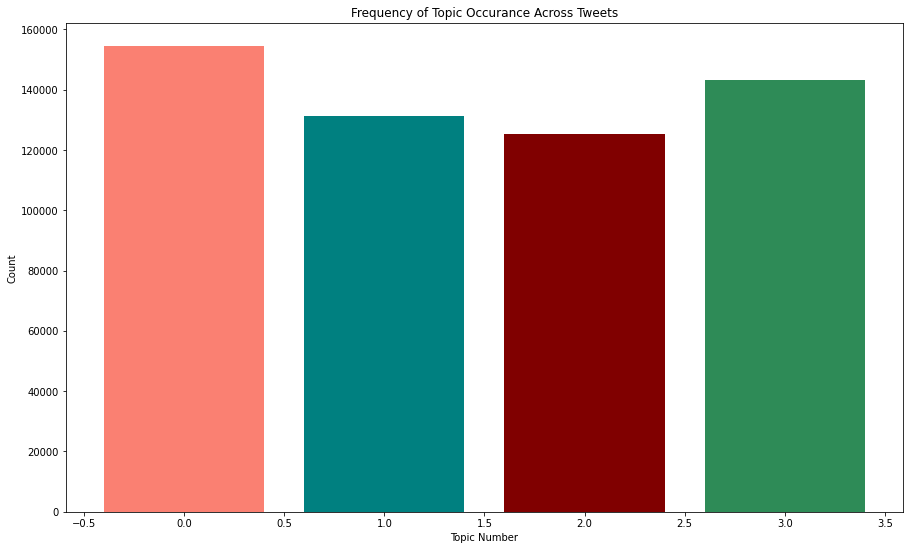

In [ ]:
num_topics = tweets_df['Topic'].unique()
topic_counts = tweets_df['Topic'].value_counts()

plt.bar(x = num_topics, height = topic_counts, color = ['salmon', 'seagreen', 'teal', 'maroon'])
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.title("Frequency of Topic Occurance Across Tweets")
plt.rc('figure', figsize=(15,9))
plt.show()

In [ ]:
def get_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keys = get_topics(tf_vectorizer, lda_model4, 100)

df_topic_keys = pd.DataFrame(topic_keys)
df_topic_keys.columns = ['Word '+str(i) for i in range(df_topic_keys.shape[1])]
df_topic_keys.index = ['Topic '+str(i) for i in range(df_topic_keys.shape[0])]

In [ ]:
# Getting top words for each topic 
Topics_theme = ['Topic1', 'Topic2', 'Topic3', 'Topic4']
df_topic_keys['topic_theme'] = Topics_theme
df_topic_keys.set_index('topic_theme', inplace=True)
print(df_topic_keys.T)

topic_theme           Topic1    Topic2          Topic3    Topic4
Word 0              pandemic        nt           covid     covid
Word 1                 covid     virus            home       new
Word 2                  need    people         nursing      mask
Word 3                  help     covid           death       nyc
Word 4                  work      know    nursing home     virus
...                      ...       ...             ...       ...
Word 95                  law     black           write       hit
Word 96      american people   nt want       home kill  lockdown
Word 97             continue  covid nt          result   protest
Word 98              provide      fake           great     study
Word 99              instead    attack  governor cuomo        th

[100 rows x 4 columns]


In [ ]:
df_topic_keys.T.to_csv('/content/drive/MyDrive/Colab Notebooks/TOPIC_WORDS_NY.csv')